# Flight Dalay & Cancellation Prediction

## import libraries

In [4]:
#pip install fastparquet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## load data

In [6]:
parquet_files = glob.glob('./archive/Combined_Flights_*.parquet')
parquet_files

['./archive\\Combined_Flights_2018.parquet',
 './archive\\Combined_Flights_2019.parquet',
 './archive\\Combined_Flights_2020.parquet',
 './archive\\Combined_Flights_2021.parquet',
 './archive\\Combined_Flights_2022.parquet']

In [7]:
df = pd.DataFrame()
for f in parquet_files:
    x = pd.read_parquet(f)
    df = pd.concat([df, x], ignore_index=True)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
27079413,2022-05-02,Capital Cargo International,GSP,CLT,False,False,1246,1248.0,2.0,2.0,...,1325.0,1351.0,14.0,1355,10.0,0.0,0.0,1300-1359,1,0.0
21484239,2021-01-16,Endeavor Air Inc.,DTW,TYS,False,False,1025,1020.0,0.0,-5.0,...,1047.0,1149.0,3.0,1208,-16.0,0.0,-2.0,1200-1259,2,0.0
4331070,2018-07-18,Southwest Airlines Co.,MKE,LAS,False,False,2000,1955.0,0.0,-5.0,...,2007.0,2126.0,8.0,2145,-11.0,0.0,-1.0,2100-2159,7,0.0
22233210,2021-08-26,American Airlines Inc.,DCA,BOS,False,False,1000,956.0,0.0,-4.0,...,1009.0,1118.0,7.0,1128,-3.0,0.0,-1.0,1100-1159,2,0.0
16127486,2020-07-23,Endeavor Air Inc.,DTW,AZO,False,False,1545,1540.0,0.0,-5.0,...,1555.0,1621.0,6.0,1632,-5.0,0.0,-1.0,1600-1659,1,0.0
11046246,2019-07-05,Comair Inc.,TRI,CLT,False,False,534,519.0,0.0,-15.0,...,531.0,554.0,16.0,637,-27.0,0.0,-2.0,0600-0659,1,0.0
6232762,2019-04-08,Republic Airlines,PVD,DCA,False,False,1425,1422.0,0.0,-3.0,...,1440.0,1553.0,8.0,1559,2.0,0.0,0.0,1500-1559,2,0.0
27772632,2022-06-03,Southwest Airlines Co.,ORD,FLL,False,False,1350,1405.0,15.0,15.0,...,1420.0,1802.0,4.0,1750,16.0,1.0,1.0,1700-1759,5,0.0
12727992,2019-11-05,United Air Lines Inc.,IAH,SFO,False,False,1645,1652.0,7.0,7.0,...,1707.0,1840.0,6.0,1904,-18.0,0.0,-2.0,1900-1959,7,0.0
16906191,2020-01-25,Republic Airlines,MCI,PHL,False,False,1054,1045.0,0.0,-9.0,...,1101.0,1415.0,5.0,1434,-14.0,0.0,-1.0,1400-1459,5,0.0


In [8]:
df.sample(10)

print('number of rows = ', len(df.index))
print('number of columns = ', len(df.columns))

header = df.columns.to_list()
print('header', len(header))
print(header)

number of rows =  29193782
number of columns =  61
header 61
['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn

## plot the data

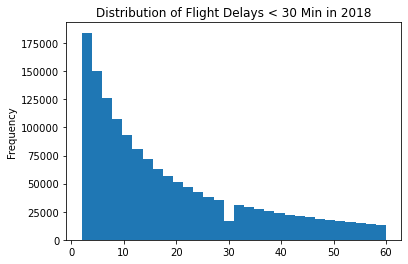

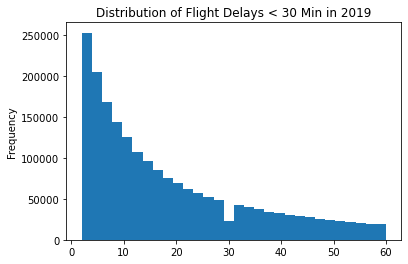

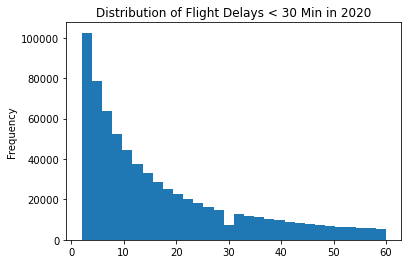

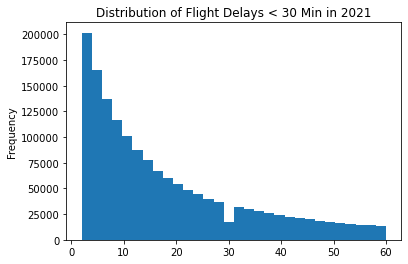

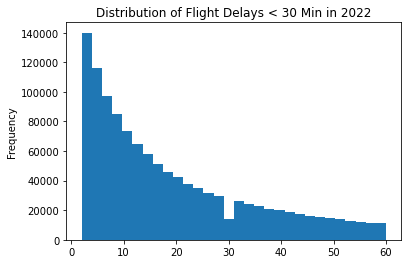

In [17]:
years = [2018, 2019, 2020, 2021, 2022]
for year in years:
    expr = f"Year == {year} and DepDelayMinutes > 1 and DepDelayMinutes < 61"
    title = "Distribution of Flight Delays < 60 Min in " + str(year)
    df.query(expr)["DepDelayMinutes"].plot(kind="hist", bins=30, title=title)
    plt.show()

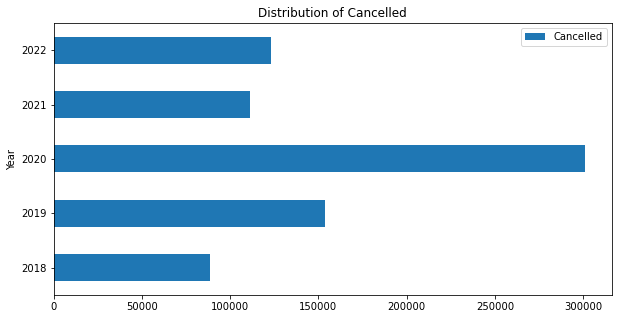

In [26]:
x = pd.DataFrame({
    'Year':[2018, 2019, 2020, 2021, 2022],
    'Cancelled':[0, 0, 0, 0, 0]
})
x.set_index('Year', inplace = True)

years = [2018, 2019, 2020, 2021, 2022]
for year in years:
    expr = f"Year == {year} and Cancelled == 1"
    x.loc[year] = df.query(expr)["Year"].count()
    
x.plot(kind="barh", figsize=(10, 5), title = "Distribution of Cancelled")
plt.show() 